In [15]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
pd.options.mode.chained_assignment = None
df=pd.read_csv(r'C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\students.csv')
df_test=pd.read_csv(r'C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\students_test.csv')

In [2]:
df_cut=df[['Growth','Shoe size']]
df_cut=df_cut.dropna()
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Growth     186 non-null    int64
 1   Shoe size  186 non-null    int64
dtypes: int64(2)
memory usage: 3.0 KB


<AxesSubplot: xlabel='Growth', ylabel='Shoe size'>

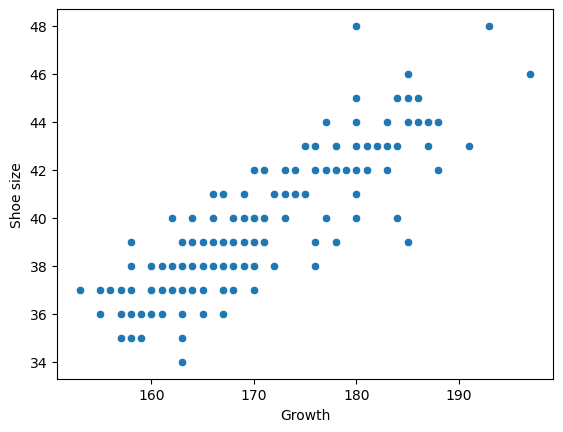

In [3]:
sns.scatterplot(data=df_cut,x='Growth',y='Shoe size')

рост человека линейно зависит от размера обуви

In [4]:
linearRegression=LinearRegression()

In [5]:
result=linearRegression.fit(df_cut['Shoe size'].values.reshape(-1,1),df_cut['Growth'].values)

In [6]:
df_cut['Predicted Growth']=result.predict(df_cut['Shoe size'].values.reshape(-1,1))

# Разделим данные на тестовую и тренировочную выборку
## Натренируем алгоритм на тренировочной выборке
## Проверим его работу на тестовой выборке

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

In [8]:
X=df_cut['Shoe size'].values.reshape(-1,1)
y=df_cut['Growth'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
Algorithm=linearRegression.fit(X_train,y_train)

In [10]:
df_test=pd.DataFrame({})
df_test['True Growth']=y_test
df_test['Mabe Growth']=Algorithm.predict(X_test)

In [11]:
df_prod=pd.DataFrame({})
#df_prod=df_prod.append([[43]], ignore_index = True)

In [12]:
df_prod['Shoe size']=[36]
df_prod

,Shoe size
0,36


In [13]:
df_prod['My Growth']=Algorithm.predict(df_prod['Shoe size'].values.reshape(-1,1))
df_prod

,Shoe size,My Growth
0,36,160.145733


# Про пальцы

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          186 non-null    int64  
 1   Growth                       186 non-null    int64  
 2   Shoe size                    186 non-null    int64  
 3   Course number                186 non-null    int64  
 4   Year of birth                186 non-null    int64  
 5   Friend number                186 non-null    int64  
 6   Russian rating               186 non-null    int64  
 7   Maths rating                 186 non-null    int64  
 8   Physics rating               186 non-null    int64  
 9   Computer science rating      186 non-null    int64  
 10  Chemistry rating             186 non-null    int64  
 11  Literature rating            186 non-null    int64  
 12  History rating               186 non-null    int64  
 13  Geography rating    

In [8]:
df_cut=df[['MIddle and index finger','Middle and ring finger','Middle and little finger']]
df_cut=df_cut.dropna()
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MIddle and index finger   186 non-null    int64  
 1   Middle and ring finger    186 non-null    float64
 2   Middle and little finger  186 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.5 KB


In [10]:
linearRegression=LinearRegression()
result=linearRegression.fit(df_cut[['Middle and ring finger',
                                    'Middle and little finger']].values.reshape(-1,2),df_cut['MIddle and index finger'].values)
# sns.scatterplot(data=df_cut,x='Growth',y='Shoe size')
result.intercept_,result.coef_

(7.436145518798953, array([0.10731496, 0.04389948]))

In [13]:
df_cut['Predict']=result.predict(df_cut[['Middle and ring finger',
                                    'Middle and little finger']].values.reshape(-1,2))

In [16]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_cut['Predict'],df_cut['MIddle and index finger'])

3.094567105647603

In [18]:
df_test_cut=df_test[['MIddle and index finger','Middle and ring finger','Middle and little finger']]

In [19]:
df_test_cut['Predict']=result.predict(df_test_cut[['Middle and ring finger',
                                    'Middle and little finger']].values.reshape(-1,2))

In [20]:
df_test_cut

,MIddle and index finger,Middle and ring finger,Middle and little finger,Predict
0,3.0,5,12,8.499514
1,9.0,12,50,10.918899
2,7.0,14,40,10.694534
3,5.0,7,10,8.626345
4,10.0,10,35,10.045777
...,...,...,...,...
93,17.0,8,37,9.918946
94,6.0,10,30,9.826280
95,4.0,7,17,8.933641
96,14.0,7,31,9.548234


In [21]:
mean_absolute_error(df_test_cut['Predict'],df_test_cut['MIddle and index finger'])

4.680118432328658

In [25]:
 df_cut=df[['Age','Year of birth', 'Month of birthday']]

In [26]:
linearRegression=LinearRegression()
result=linearRegression.fit(df_cut[['Year of birth', 'Month of birthday']].values.reshape(-1,2),df_cut['Age'].values)
# sns.scatterplot(data=df_cut,x='Growth',y='Shoe size')
result.intercept_,result.coef_

(22.929930296699347, array([-0.00145442,  0.10005863]))

In [27]:
df_test=pd.read_csv(r'C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\students_test.csv')

In [28]:
df_test_cut=df_test[['Age','Year of birth', 'Month of birthday']]
df_test_cut['Predict']=result.predict(df_test_cut[['Year of birth', 'Month of birthday']].values.reshape(-1,2))

In [29]:
df_test_cut.head()

,Age,Year of birth,Month of birthday,Predict
0,22,2000,6,20.621444
1,20,2002,3,20.318359
2,21,2001,6,20.619989
3,21,2001,7,20.720048
4,22,2000,5,20.521385


In [30]:
mean_absolute_error(df_test_cut['Predict'],df_test_cut['Age'])

1.6054960000660925

Будем по признакам 'Hair length','Shoe size' предсказывать признак 'Sex'. Загрузите эти признаки из таблицы students.csv

Запустите модель DecisionTreeClassifier, указав максимальную глубину дерева равную 2.



Чему равно заштрихованное число в корне дерева?

In [33]:
from sklearn import tree
df_cut=df[['Hair length','Shoe size','Sex']]
model=tree.DecisionTreeClassifier(max_depth=2)
model.fit(df_cut[['Hair length','Shoe size']].values.reshape(-1,2),df_cut['Sex'].values)
df_test['Predicted']=model.predict(df_test[['Hair length','Shoe size']])

In [36]:
pd.crosstab(df_test['Predicted'],df_test['Sex'])

Sex,женский,мужской
Predicted,,
женский,61,2
мужской,1,34


Будем по признакам 'Hair length','Shoe size' предсказывать признак 'Sex'. Загрузите эти признаки из таблицы students.csv

Запустите модель DecisionTreeClassifier, указав максимальную глубину дерева равную 2,  и получите предсказания для студентов из тестовой выборки students_test.csv

В окошко ответа запишите значение recall (для мужчин)

In [42]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(df_test['Predicted'],df_test['Sex'])

(array([0.94444444, 0.98387097]),
 array([0.97142857, 0.96825397]),
 array([0.95774648, 0.976     ]),
 array([35, 63], dtype=int64))

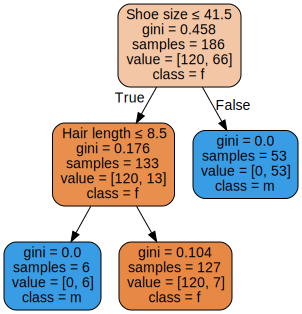

In [35]:
import graphviz


[Text(0.6, 0.9375, 'x[1] <= 41.5\ngini = 0.458\nsamples = 186\nvalue = [120, 66]'),
 Text(0.5333333333333333, 0.8125, 'x[0] <= 8.5\ngini = 0.176\nsamples = 133\nvalue = [120, 13]'),
 Text(0.4666666666666667, 0.6875, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6, 0.6875, 'x[1] <= 39.5\ngini = 0.104\nsamples = 127\nvalue = [120, 7]'),
 Text(0.3333333333333333, 0.5625, 'x[1] <= 35.5\ngini = 0.039\nsamples = 101\nvalue = [99, 2]'),
 Text(0.13333333333333333, 0.4375, 'x[0] <= 52.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.06666666666666667, 0.3125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.2, 0.3125, 'x[0] <= 57.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.13333333333333333, 0.1875, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.26666666666666666, 0.1875, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5333333333333333, 0.4375, 'x[0] <= 36.0\ngini = 0.021\nsamples = 93\nvalue = [92, 1]'),
 Text(0.4666666666666667, 0.3125, 'x[0] <= 33.0\ngini

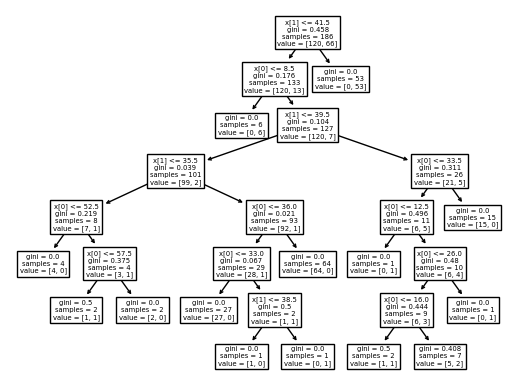

In [30]:
tree.plot_tree(model)

Будем по признакам 'Year of birth', 'Month of birthday' предсказывать признак 'Age'. Загрузите эти признаки из таблицы students.csv

Запустите модель DecisionTreeRegressor, установив максимальную глубину дерева 3. Чему равно заштрихованное число в корне построенного дерева?

[Text(0.5, 0.875, 'x[0] <= 1996.5\nsquared_error = 11.967\nsamples = 186\nvalue = 20.688'),
 Text(0.25, 0.625, 'x[1] <= 11.0\nsquared_error = 80.89\nsamples = 10\nvalue = 30.1'),
 Text(0.125, 0.375, 'x[1] <= 8.0\nsquared_error = 7.673\nsamples = 7\nvalue = 26.429'),
 Text(0.0625, 0.125, 'squared_error = 3.2\nsamples = 5\nvalue = 25.0'),
 Text(0.1875, 0.125, 'squared_error = 1.0\nsamples = 2\nvalue = 30.0'),
 Text(0.375, 0.375, 'x[0] <= 1973.0\nsquared_error = 146.889\nsamples = 3\nvalue = 38.667'),
 Text(0.3125, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 55.0'),
 Text(0.4375, 0.125, 'squared_error = 20.25\nsamples = 2\nvalue = 30.5'),
 Text(0.75, 0.625, 'x[0] <= 2001.5\nsquared_error = 2.732\nsamples = 176\nvalue = 20.153'),
 Text(0.625, 0.375, 'x[0] <= 1999.5\nsquared_error = 1.28\nsamples = 83\nvalue = 21.578'),
 Text(0.5625, 0.125, 'squared_error = 0.628\nsamples = 22\nvalue = 23.091'),
 Text(0.6875, 0.125, 'squared_error = 0.392\nsamples = 61\nvalue = 21.033'),
 Text(0.875, 

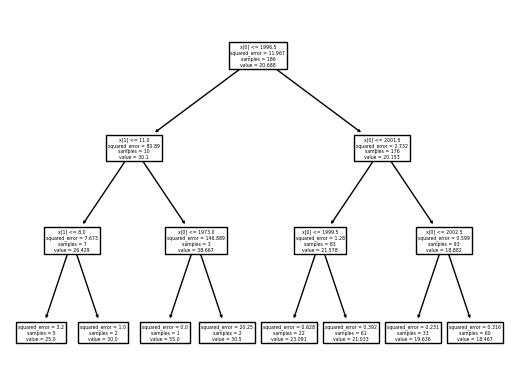

In [47]:
df_new=df[['Year of birth', 'Month of birthday','Age']]
model2=tree.DecisionTreeRegressor(max_depth=3)
model2.fit(df[['Year of birth', 'Month of birthday']].values.reshape(-1,2),df['Age'].values)
tree.plot_tree(model2)

Будем по признакам 'Year of birth', 'Month of birthday' предсказывать признак 'Age'. Загрузите эти признаки из таблицы students.csv

Запустите модель DecisionTreeRegressor, установив максимальную глубину дерева 3 и получите предсказания для студентов из тестовой выборки students_test.csv

В окошко ответа запишите среднюю абсолютную ошибку mean absolute error на тестовой выборке.

In [52]:
df_new_test=df_test[['Year of birth', 'Month of birthday','Age']]
df_new_test['Predicted']=model2.predict(df_new_test[['Year of birth','Month of birthday']].values.reshape(-1,2))
mean_absolute_error(df_new_test['Predicted'],df_new_test['Age'])

0.7241329318612689